# Salary Prediction

Problem: Given a dataset which captures gross salary from july 2013 through jun,2014 and includes only those employees who were employedmon june, 2014. Predict salaries for employees in blatimore.

#  Outline
1.Import Dataset
2.Data Cleaning and Data preparation
3.Exploratory Data Analysis
4.Feature Engineering
5.Train Test split
6.Model Building
7.Model evaluation

In [2]:
#Linear regression, at it's core, is a way of calculating the relationship between two variables.
#Linear regression creates a linear mathematical relationships between these two variables. 
#It enables calculation predicting the dependent variable if the dependent variable is known.

In [8]:
import pandas as ad

In [2]:
#Import Libraries for analysis
import numpy as np # Alias
import pandas as pd # preprocessing

#Import Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#Import libraries for train test split
from sklearn.model_selection import train_test_split#(Scikit learn )

#Import library for scaling
from sklearn.preprocessing import StandardScaler

#Import library for model building
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

The data set is in csv format and can be imported using read_csv method available in pandas library.

In [14]:
salary = pd.read_csv('//content//train_.csv')

In [16]:
salary.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


# Data cleaning and preparation

In [17]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


Its always a good practice to work on copy of datasets instead of working on original data itself,

In [18]:
salary_cpy = salary.copy()

In [20]:
type(salary) # table

pandas.core.frame.DataFrame

In [19]:
salary_cpy.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [22]:
# Since name has leading space so we are removing it.
salary_cpy.columns = salary_cpy.columns.str.strip()

In [23]:
salary_cpy.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [25]:
# check null values
salary_cpy.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [26]:
salary_cpy.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [29]:
salary_cpy=salary_cpy.dropna(subset=['Date'])

salary_cpy.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [31]:
# Lets drop gross pay column
# salary_cpy = salary_cpy.drop('GrossPay',axis=1)

# salary_cpy.isnull().sum()

In [33]:
#salary_cpy.AgencyID.value_counts()

There are 1177 agencies in blatimore.As per general understanding AgencyId represents agency, so we should have the same number of agencies as well. But after validating it seems one agency is having multiple agency Ids.

In [35]:
# Value_counta for Agency
salary_cpy.IsHoliday.value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [36]:
 #salary_cpy.JobTitle.value_counts()

In [37]:
# value counts on HireDate
#salary_cpy.HireDate.value_counts()

In [38]:
salary_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 16.5+ MB


Removing $ from annual salary and converting it into float

In [40]:
salary_cpy['AnnualSalary'] = salary_cpy['AnnualSalary'].apply(lambda x : (float)(str(x)[1:]))

In [ ]:
salary_cpy.AnnualSalary.value_counts()

In [ ]:
salary_cpy.info()

In [ ]:
salary_cpy['HireDay']=salary_cpy['HireDate'].apply(lambda x : (int)(str(x)[3:5]))
salary_cpy['HireMonth']= salary_cpy['HireDate'].apply(lambda x: (int)(str(x[:2])))
salary_cpy['HireYear']= salary_cpy['HireDate'].apply(lambda x: (int)(str(x[6:])))

In [ ]:
salary_cpy.head()

In [ ]:
# trimming all categorical columns to make sure there are no leading and trailing spaces and no double spaces between words

In [ ]:
salary_cpy['JobTitle']=salary_cpy['JobTitle'].apply(lambda x : str(x).strip().replace("  "," "))
salary_cpy['AgencyID']=salary_cpy['AgencyID'].apply(lambda x : str(x).strip().replace("  "," "))
salary_cpy['Agency']=salary_cpy['Agency'].apply(lambda x : str(x).strip().replace("  "," "))


In [ ]:
salary_cpy.head()

In [ ]:
# It can be seen that some of the job titles are in upper case. some with lower and with mix of both which might effect analysis, 
#so coverting them to uppercase and also converting agency and agencyid.

In [ ]:
salary_cpy['JobTitle']=salary_cpy['JobTitle'].apply(lambda x : str(x).upper())
salary_cpy['AgencyID']=salary_cpy['AgencyID'].apply(lambda x : str(x).upper())
salary_cpy['Agency']=salary_cpy['Agency'].apply(lambda x : str(x).upper())

In [ ]:
salary_cpy.head()

The last thing left in data preparation is outlier treatment. so lets create Box Plot for annual salary and check for outliers.


In [ ]:
salary_cpy.shape

In [ ]:
salary_cpy.AnnualSalary.plot.box()
plt.show()

In [ ]:
# summary stats of annual salary
salary_cpy.AnnualSalary.describe()

delete rows whose annual salary >150000 according to box plot

In [ ]:
salary_cpy= salary_cpy[salary_cpy['AnnualSalary']<140000]

In [ ]:
salary_cpy.shape

In [ ]:
salary_cpy.AnnualSalary.plot.box()
plt.show()

In [ ]:
# Now that we are done with the data preparation we can move to next step that is Exploratory Data Analysis.

In [ ]:
# We will first check the distribution of annual salary by creating the distplot
sns.distplot(salary_cpy.AnnualSalary)
plt.title("Annual Salary distribution plot",fontsize=15)
plt.show()

The data is distributed very randomly and there seems to be not many people with salary more than 100000

Let us check jobs for which people are hired the most.For this we will be creating a barplot.

In [ ]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No of people hired')
plt.title('Top 10 jobs for which hiring is highest',fontsize=20)
plt.show()

This plot shows more number of people were hired for aide blue chip followed by job of police officer.other than these two all other job titles have less than 1000 workers. 

Let us check the top 10 jobs that fetch highest salary

In [ ]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Avg Salary')
plt.title('Top 10 Highly paid jobs',fontsize=20)
plt.show()

Number of jobs whose average pay is more than total average salary

In [ ]:
# Find mean salary
mean_sal = salary_cpy.AnnualSalary.mean()

# number of jobs paying more than mean salary
good_paying_jobs = salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_paying_jobs[good_paying_jobs.AnnualSalary>mean_sal]['JobTitle'].count()

In [ ]:
good_paying_jobs

Let us check the top 10 agencies and agencyid with highest number of employees

In [ ]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('no of employees')
plt.title('top agencies with highest number of employees')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('no of employees')
plt.title('top agencieID with highest number of employees')
plt.show()

Let us check people hired in which year have lowest salaries.This is to check if as the hire year increases the salary decreases. Because, people have higher experience salary should be high.

In [ ]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.ylabel('average salary')
plt.title('average salary of employee based on hire year')
plt.show()

The trend above suggests that the salary of the employees increases with experience in the company. So now lets calculate experience in days with Agency.

In [ ]:
# checking if month has any such effect 
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.ylabel('average salary')
plt.title('average salary of employee based on hire month')
plt.show()

In [ ]:
# checking if month has any such effect 
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.ylabel('average salary')
plt.title('no of employee hired based on hire month')
plt.show()

We can conclude more employees are hired in month of may and june but they have relatively lower average salaries.

<Figure size 1080x1440 with 0 Axes>

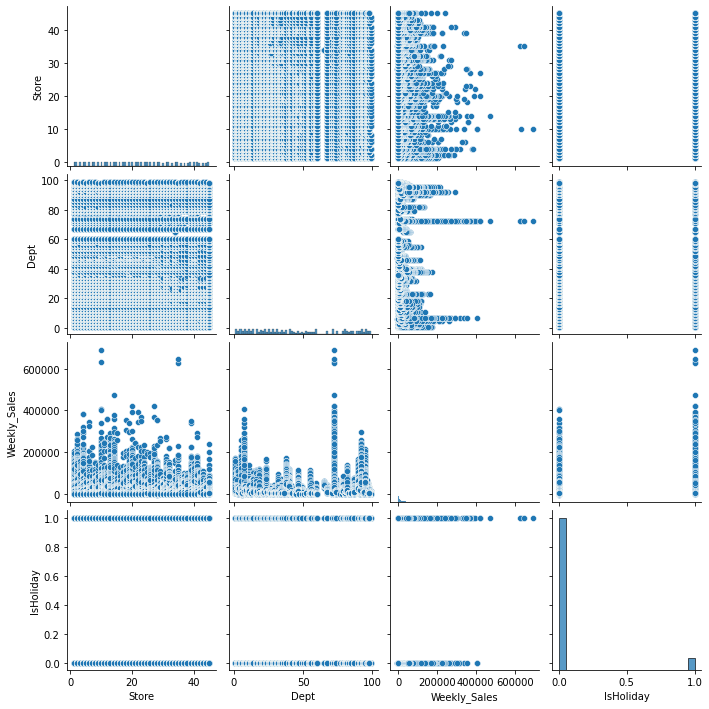

In [42]:
# Lets check if there is any relation between any of the numerical variable using pairplot
plt.figure(figsize=(15,20))
sns.pairplot(salary_cpy)
plt.show()

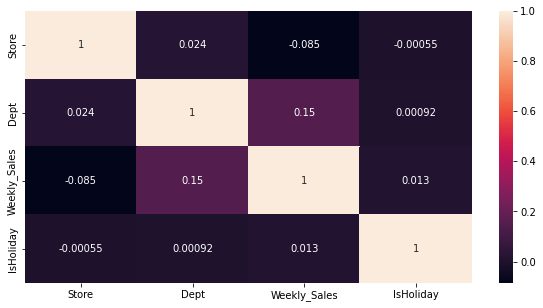

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(salary_cpy.corr(),annot=True)

# Feature Engineering

In [ ]:
# create a copy of the dataframe
salary_master=salary_cpy.copy()

In [ ]:
#We are using mean encoding here as the number of labels of categoriacl variables are very high and 
#if we use any other method then that will create unnecessary variables or labelling might not be appropriate.

In [ ]:
# Apply mean encoding for job title
mean_job = salary_master.groupby('JobTitle')['AnnualSalary'].mean()
salary_master['JobTitle']= salary_master['JobTitle'].map(mean_job)
salary_master['JobTitle']

In [ ]:
# Apply mean encoding for agency
mean_agency = salary_master.groupby('Agency')['AnnualSalary'].mean()
salary_master['Agency']= salary_master['Agency'].map(mean_agency)
salary_master['Agency']

In [ ]:
# Apply mean encoding for AgencyId
mean_agencyid = salary_master.groupby('AgencyID')['AnnualSalary'].mean()
salary_master['AgencyID']= salary_master['AgencyID'].map(mean_agencyid)
salary_master['AgencyID']

In [ ]:
salary_master.info()

In [ ]:
# drop name, hiredate column
salary_master = salary_master.drop(['HireDate','Name'],axis=1)

salary_master.info()

In [ ]:
sns.heatmap(salary_master.corr(),annot=True)

# Train -Test split

In [ ]:
# split data into train and test using train-test split
salary_train, salary_test = train_test_split(salary_master,train_size=0.7, random_state=10)

In [ ]:
print(salary_train.shape)
print(salary_test.shape)

In [ ]:
# divide train set into dependent and independent variables
y_train = salary_train.pop('AnnualSalary')
x_train = salary_train

## divide test set into dependent and independent variables
y_test = salary_test.pop('AnnualSalary')
x_test = salary_test

In [ ]:
x_train

# Feature scaling

In [ ]:
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
x_train

In [ ]:
x_test[x_test.columns] =scaler.transform(x_test[x_test.columns])

# Model Building
we are building linear regression model

In [ ]:
## small example that how linear regression works

In [ ]:
example_df = pd.DataFrame({'Performance':[1,2,3,4,5,6],'levels':[2,5,4,6,1,3],'Target':[100,300,200,600,200,500]})
example_df

In [ ]:
example_lr = LogisticRegression() # y(100) = m1(area)1 + m2(petrol)2+m3()3 + c
example_model = example_lr.fit(example_df[['Performance','levels']],example_df['Target']) 

In [ ]:
# R square value
example_model.score(example_df[['Performance','levels']],example_df['Target'])# 30%

In [ ]:
print(example_lr.coef_)
print(example_lr.intercept_)

In [ ]:
example_model.predict([[5, 2, 3]])

In [ ]:
## Applying linear regression on Actual data

lr = LinearRegression()

salary_reg = lr.fit(x_train,y_train)

In [ ]:
salary_reg.score(x_train,y_train)

In [ ]:
salary_reg.score(x_test,y_test)

### Even though our model performs well on train data, that doesn't mean the model is good. The model should equally perform well on the test data .i.e the data that model has not encountered yet. only then a model is considered a good model. if the model is just performing good on training data and not on test data then we can say overfitting is there. and when model doest perform well on either train data and test data then underfitting is there.
####  Hyperparameter tuning 
#### Now overfitting  can be treated by regularization.

In [ ]:
print(salary_reg.coef_)
print(salary_reg.intercept_)

In [ ]:
y_pred = salary_reg.predict(x_test)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
## out  of all features agencyid, job title and hireyear are the major driver for explaining variance in annual salary
#because yhey have higher coeficient value.
## other than first two features all features are negatively correlated with annual salary.